In [1]:
import numpy as np
from tensorflow.python.keras import datasets
from matplotlib import pyplot as plt
import cv2
import tensorflow as tf

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


## import data


In [3]:
# Import data
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [4]:
#remove one dimension so it fits for the output layer:
#y_train: 50000,1 -> 50000,
#y_test: 5000,1 -> 5000,

y_train = y_train.flatten()
y_test = y_test.flatten()

In [5]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000,)


In [6]:
print(x_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000,)


In [7]:
cifar_10_categories = {0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse", 8:"ship",9:"truck"}

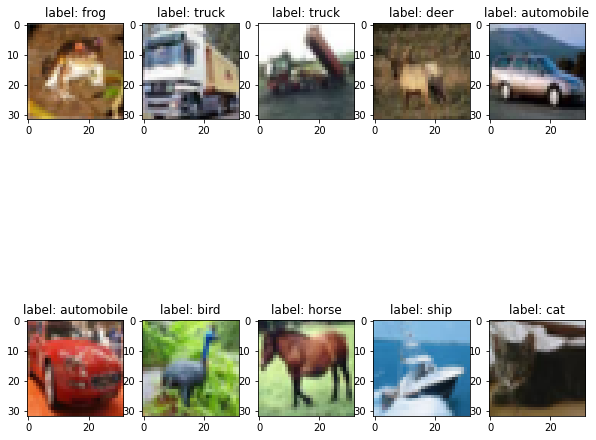

In [8]:
nrows, ncols = 2, 5  # array of sub-plots
figsize = [10, 10]     # figure size, inches

# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

# plot simple raster image on each sub-plot
for i, axi in enumerate(ax.flat):
    # i runs from 0 to (nrows*ncols-1)
    # axi is equivalent with ax[rowid][colid]
    axi.imshow(x_train[i])
    axi.set_title("label: "+ cifar_10_categories[int(y_train[i])])
plt.show()

## Normalization and Reshaping

In [9]:
input_shape = (32, 32, 3)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)
x_test=x_test / 255.0

## One-Hot-encoding

In [10]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

In [11]:
y_train[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)>

## define the model

In [12]:
num_classes = 10

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=x_train.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    #tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    #tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])



## hyperparameters

In [13]:
batch_size = 20
epochs = 50
learning_rate = 0.0001

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate, decay=1e-06),
            loss='categorical_crossentropy', metrics=['acc'])

## training

In [14]:
history = model.fit(x_train, y_train, batch_size=batch_size,
                    epochs=epochs)

Epoch 1/50
2500/2500 [==============================] - 18s 7ms/step - loss: 1.6833 - acc: 0.3883
Epoch 2/50
2500/2500 [==============================] - 16s 7ms/step - loss: 1.3506 - acc: 0.5159
Epoch 3/50
2500/2500 [==============================] - 17s 7ms/step - loss: 1.1929 - acc: 0.5797
Epoch 4/50
2500/2500 [==============================] - 17s 7ms/step - loss: 1.0823 - acc: 0.6199
Epoch 5/50
2500/2500 [==============================] - 17s 7ms/step - loss: 1.0000 - acc: 0.6505
Epoch 6/50
2500/2500 [==============================] - 17s 7ms/step - loss: 0.9365 - acc: 0.6727
Epoch 7/50
2500/2500 [==============================] - 17s 7ms/step - loss: 0.8832 - acc: 0.6941
Epoch 8/50
2500/2500 [==============================] - 17s 7ms/step - loss: 0.8420 - acc: 0.7066
Epoch 9/50
2500/2500 [==============================] - 17s 7ms/step - loss: 0.8074 - acc: 0.7218
Epoch 10/50
2500/2500 [==============================] - 17s 7ms/step - loss: 0.7741 - acc: 0.7325
Epoch 11/50
2500/25

## evaluate and testdata

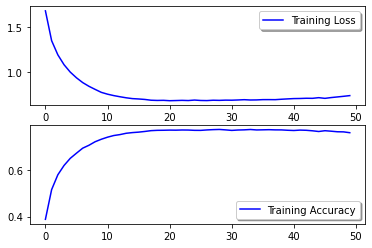

In [15]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9659 - acc: 0.7194


## predict on some samples

In [20]:
pred_sample = np.argmax(model.predict(x_test[:10]),1)

In [24]:
y_test[:10]

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [22]:
pred_sample

array([3, 8, 8, 0, 6, 6, 9, 2, 3, 6], dtype=int64)

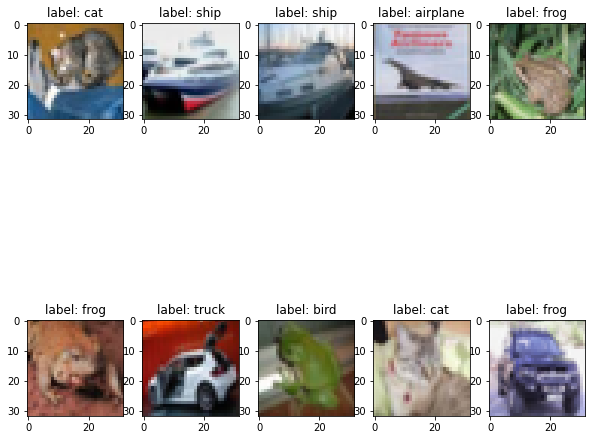

In [25]:
nrows, ncols = 2, 5  # array of sub-plots
figsize = [10, 10]     # figure size, inches

# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

# plot simple raster image on each sub-plot
for i, axi in enumerate(ax.flat):
    # i runs from 0 to (nrows*ncols-1)
    # axi is equivalent with ax[rowid][colid]
    axi.imshow(x_test[i])
    axi.set_title("label: "+ cifar_10_categories[int(pred_sample[i])])
plt.show()